> Seaborn is a library for making statistical graphics in Python. It builds on top of [matplotlib](https://matplotlib.org/) and integrates closely with [pandas](https://pandas.pydata.org/) data structures.
>
> 
>
> ——[An introduction to seaborn — seaborn 0.13.2 documentation (pydata.org)](https://seaborn.pydata.org/tutorial/introduction.html)

# 一个简单的例子

## 完整代码即效果一览

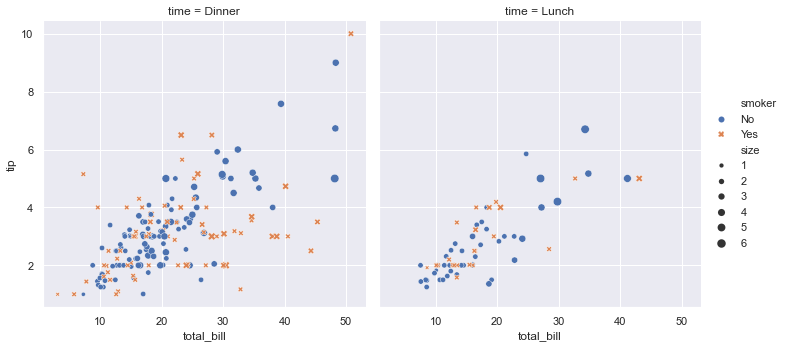

In [1]:
# 导入seaborn和pandas
import seaborn as sns
import pandas as pd

# 使用默认主题
sns.set_theme()

# 加载数据集
tips = pd.read_csv('tips.csv')

# 可视化
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

## 代码拆解分析

```python
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)
```

这个用函数`relplot()`图像展示了`tips`数据集中5个变量之间的关系。注意：我们只是提供了变量的名字。与`matplotlib`不同，我们不需要说明变量用于颜色或标记（marker）等具体属性，这让我们可以专注于解决具体问题，而非纠结于如何控制`matplotlib`。

# 用于统计图标的高级API

世界上没有绝对最好的方法实现数据可视化。不同的问题对应不同的解决方案。`seaborn`用连续的面向数据集的API使得在不同数据集之间转换变得容易。

函数`relplot()`由于被设计用于实现不同统计之间的**关系（relationships）**而得名。函数`relplot()`有一个`kind`参数实现不同统计图表之间的简单转换。

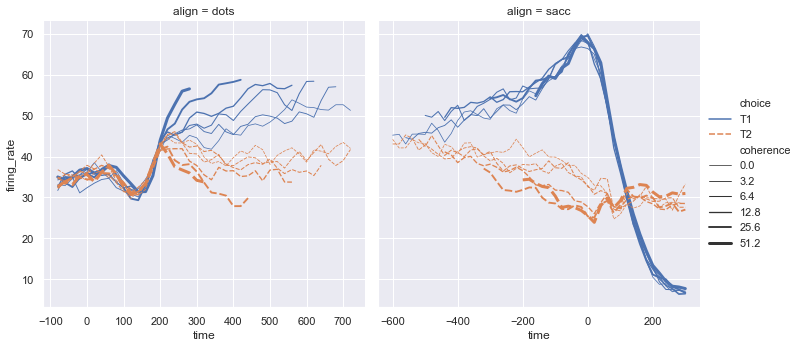

In [2]:
dots = pd.read_csv("dots.csv")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

我们注意到`size`和`style`参数在散点图和折线图中都有应用，但在两种图中的效果却不相同。散点图中是改变标记点的区域和形状，而折线图中则是改变折线的宽度和虚线。当然，我们不用把这些都记在脑袋里，我们只需要专注于图像的整体结构和我们想要传达的信息。

# 统计估计

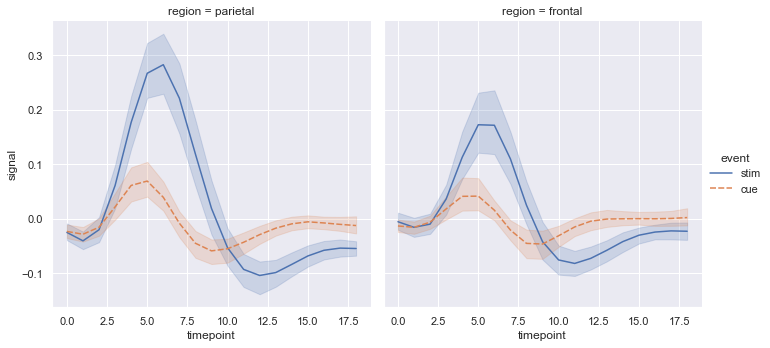

In [3]:
fmri = pd.read_csv("fmri.csv")
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

同样，利用`lmplot()`函数可以绘制散点图的拟合曲线和置信区间。

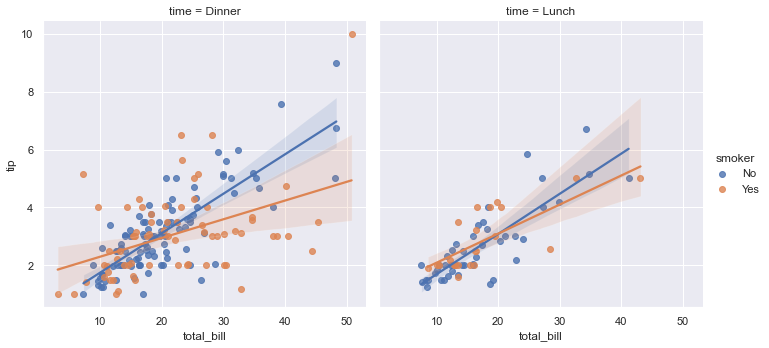

In [4]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

# 分布展示

函数`displot()`支持多种实现分布可视化的方法，包括传统的直方图和核密度图等。

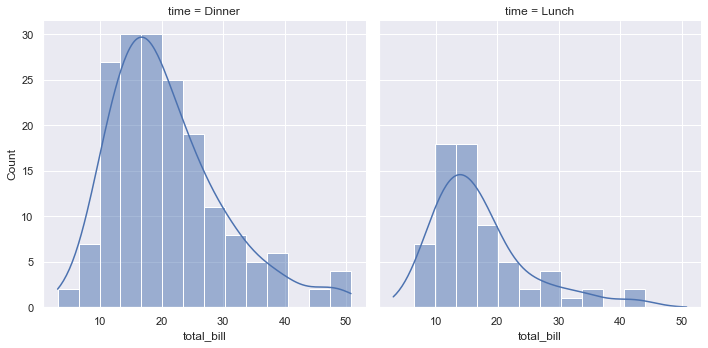

In [5]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)

`seaborn`同样支持强大却不太常见的图表，例如经验分布函数

> 经验分布函数（英语：empirical distribution function）是统计学中一个与样本经验测度有关的分布函数。该累积分布函数是在所有n个数据点上都跳跃1/n的阶跃函数。对被测变量的某个值而言，该值的分布函数值表示所有观测样本中小于或等于该值的样本所占的比例。
> 
> 经验分布函数是对用于生成样本的累积分布函数的估计。根据Glivenko–Cantelli定理可以证明，经验分布函数以概率1收敛至这一累积分布函数。
> 
> ——维基百科

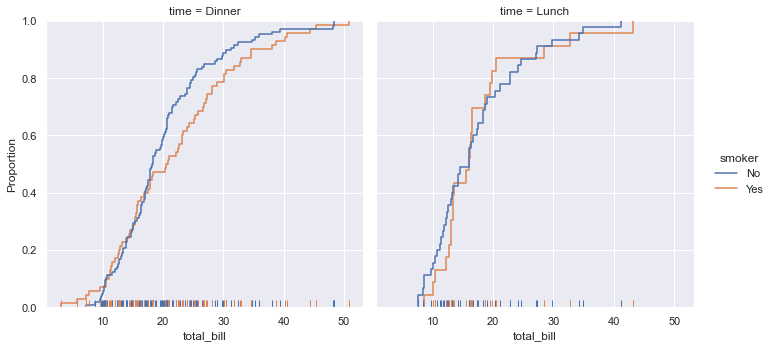

In [6]:
sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True)

# 分组数据

`seaborn`中有几种图像类型面向分组绘图。它们可以使用`catplot()`函数实现。

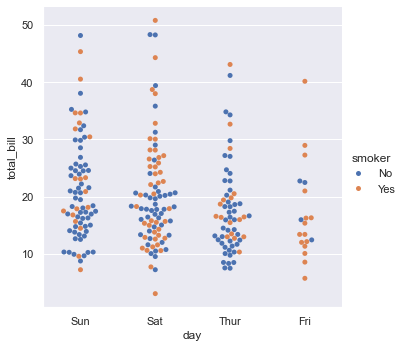

In [7]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")

当然，除了散点图，我们也可以绘制核密度曲线，即小提琴图。

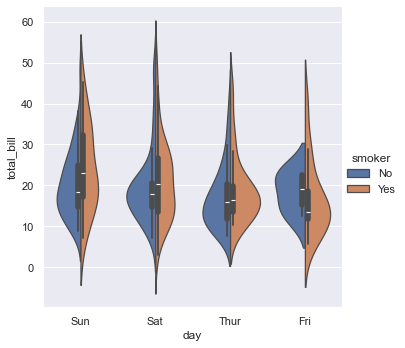

In [8]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)

或者，我们可以只展示均值和置信区间。

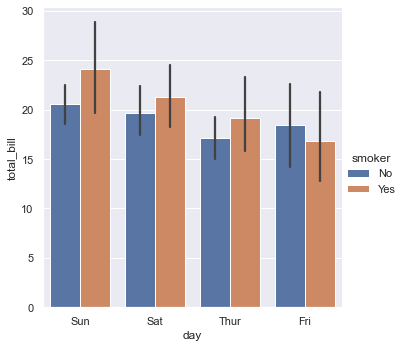

In [9]:
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")

# 复杂数据集的多维度展示

一些`seaborn`函数联合了多种图像类型来快速而详实地给出数据集的总结。例如`joinplot()`函数专注于单一的关系，它可以在变量分布的边缘绘制两个变量的联合分布。

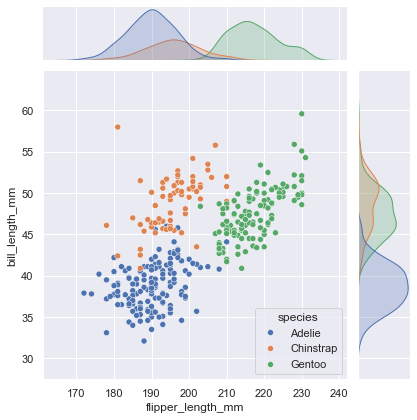

In [10]:
penguins = pd.read_csv("penguins.csv")
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

另外一个函数`pairplot()`则展示了更广的维度：它展示了所有两个变量之间的关系。

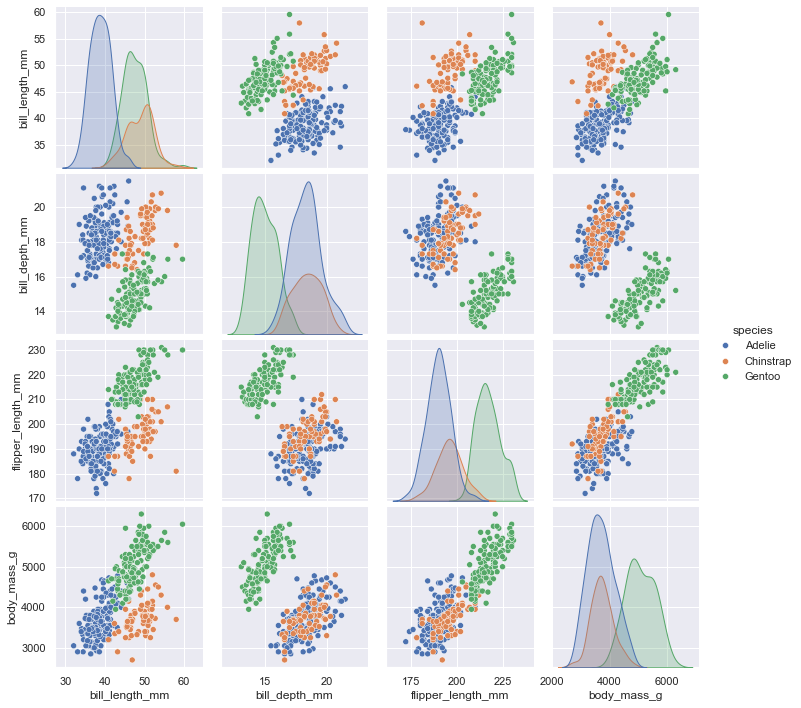

In [11]:
sns.pairplot(data=penguins, hue="species")

# 绘图的更底层工具

这些工具的工作原理是将轴级绘图功能与管理图形布局的对象相结合，从而将数据集的结构链接到轴网格。这两个元素都是公共API的一部分，我们可以直接使用它们来创建复杂的图形。

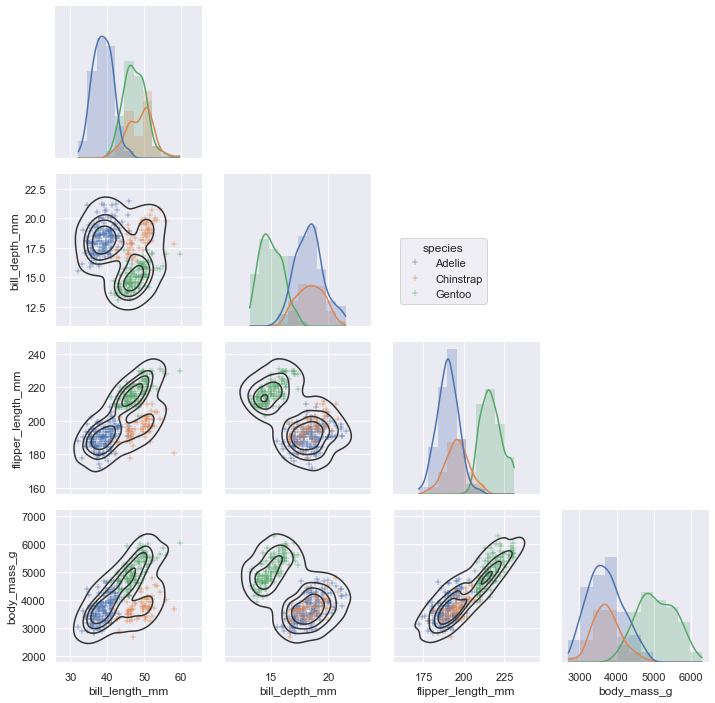

In [12]:
g = sns.PairGrid(penguins, hue="species", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

# 默认与自定义

`seaborn`只需调用一次函数即可创建完整的图形：它将自动添加信息丰富的轴标签和图例。

在许多情况`下，seabo`n 还会根据数据的特征为其参数选择默认值。例我们映射使用不同的色调（蓝色、橙或有时是绿色）来调的分类级别。在映射数字变量时，某些函数将切换到连续渐变：

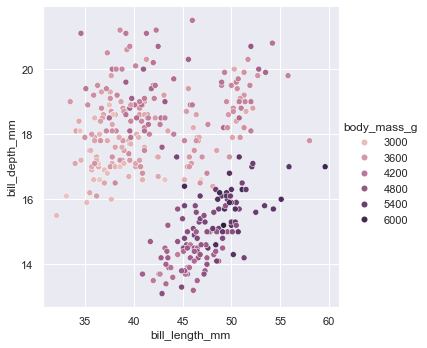

In [13]:
sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g"
)

`seaborn`允许多个级别的自定义。它定义了适用于所有图形的多个内置主题，且具有标准化参数，可以修改每个图的语义映射，并传递给底层`matplotlib`，从而实现更多控制。创建图像后，可以通过`seaborn`的API修改其属性，也可以通过底层的`matplotlib`进行调整。

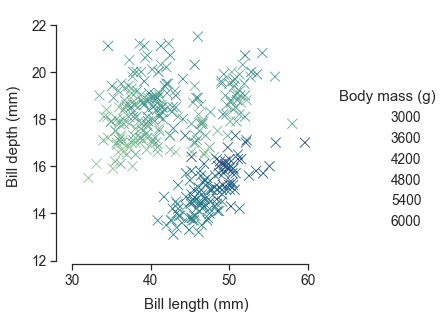

In [14]:
sns.set_theme(style="ticks", font_scale=1.25)
g = sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g",
    palette="crest", marker="x", s=100,
)
g.set_axis_labels("Bill length (mm)", "Bill depth (mm)", labelpad=10)
g.legend.set_title("Body mass (g)")
g.figure.set_size_inches(6.5, 4.5)
g.ax.margins(.15)
g.despine(trim=True)